# 1 Prepare Work

In [1]:
import numpy as np
import os.path
import jieba
import pandas as pd
import re

In [2]:
csv_path = r'D:\Assignment\Project_01\newsdata.csv'
if not os.path.isfile(csv_path):
    print('Input error, please enter correct path!')
else:
    print('Success!')

Success!


In [3]:
ori_news_csv = pd.read_csv(csv_path, encoding='ansi', error_bad_lines=False, usecols=[0, 2, 3])

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
ori_news_csv.head()

,id,source,content
0,89617,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...
1,89616,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...
2,89615,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\n至于...
3,89614,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\n
4,89613,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\n@深圳交警微博称：昨日清晨交...


In [5]:
ori_news_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90532 entries, 0 to 90531
Data columns (total 3 columns):
id         90532 non-null object
source     89720 non-null object
content    87165 non-null object
dtypes: object(3)
memory usage: 2.1+ MB


In [6]:
ori_news_csv.describe()

,id,source,content
count,90532,89720,87165
unique,90428,1049,74995
top,",{""type"":""新闻""",新华社,\n\n
freq,32,78661,177


In [8]:
news_csv = ori_news_csv.dropna(axis=0)

In [9]:
news_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87163 entries, 0 to 90531
Data columns (total 3 columns):
id         87163 non-null object
source     87163 non-null object
content    87163 non-null object
dtypes: object(3)
memory usage: 2.7+ MB


## 2 Process Data

## 2.1 Change the label

In [ ]:
#将label分为两类‘新华社’与‘非新华社’
for i, tmp in enumerate(news_csv['source']):
    if tmp == '新华社':
        continue
    else:
        news_csv['source'].replace([tmp], ['非新华社'], inplace=True)

In [13]:
news_csv['source'].value_counts()

新华社     78661
非新华社     8502
Name: source, dtype: int64

In [14]:
' '.join(jieba.cut(news_csv['content'][3]))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.971 seconds.
Prefix dict has been built succesfully.


'这是 6 月 18 日 在 葡萄牙 中部 大 佩德罗 冈 地区 拍摄 的 被 森林 大火 烧毁 的 汽车 。 新华社 记者 张立 云摄 \n'

In [18]:
news_csv = news_csv.drop(['id'], axis=1)

In [19]:
news_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87163 entries, 0 to 90531
Data columns (total 2 columns):
source     87163 non-null object
content    87163 non-null object
dtypes: object(2)
memory usage: 4.5+ MB


In [20]:
news_csv.head()

,source,content
0,非新华社,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...
1,非新华社,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...
2,非新华社,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\n至于...
3,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\n
4,非新华社,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\n@深圳交警微博称：昨日清晨交...


## 2.2 Get 1000 samples of '新华社' and 1000 samples of '非新华社' 

In [23]:
ori_X_yes = []
ori_X_no  = []
i = 0
j = 0

In [24]:
content_list = news_csv['content'].tolist()
for k, source in enumerate(news_csv['source']):
    #if k == 9 or k == 102 or k==665 or k == 1694 or k==1750 or k==2033 or k==2850:continue
    if source == '新华社' and i < 1000:
        ori_X_yes.append(content_list[k])
        i += 1
    elif source == '非新华社' and j < 1000:
        ori_X_no.append(content_list[k])
        j += 1
    elif i >= 1000 and j >= 1000:
        break

In [25]:
len(ori_X_yes)

1000

In [26]:
len(ori_X_no)

1000

In [27]:
ori_X = ori_X_yes + ori_X_no

In [28]:
len(ori_X)

2000

## 2.3 Cut the samples

In [29]:
def token(string):
    return ''.join(re.findall(r'[\w|\d]+', string))
def cut(string):
    return jieba.lcut(string)

In [33]:
cut_ori_X = []

In [34]:
for news in ori_X:
    tmp = cut(token(news))
    if '新华社' in tmp:
        tmp.remove('新华社')
    cut_ori_X.append(tmp)

In [35]:
len(cut_ori_X)

2000

In [36]:
cut_ori_X[0]

['这是',
 '6',
 '月',
 '18',
 '日',
 '在',
 '葡萄牙',
 '中部',
 '大',
 '佩德罗',
 '冈',
 '地区',
 '拍摄',
 '的',
 '被',
 '森林',
 '大火',
 '烧毁',
 '的',
 '汽车',
 '记者',
 '张立',
 '云摄']

# 3 Embdding

## 3.1 Get the probability

In [37]:
def memo(func):
    cache = {}

    def _wrap(*args): ## ? *args, **kwargs
        if args in cache: result = cache[args]
        else:
            result = func(*args)
            cache[args] = result
        return result
    return _wrap

In [38]:
@memo
def get_probability(word, model):
    keys = model.vocab.keys()
    total_words_count = sum([v.count for k, v in model.vocab.items()])
    esp = 1 / total_words_count

    if word in keys:
        word_count = model.vocab[word].count
        return word_count / total_words_count
    else:
        return esp

In [39]:
Word2vec_model_path = r'D:\Assignment\Project_01\X_Word2vec_model.w2v'

In [40]:
import gensim

D:\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [41]:
word2vec = gensim.models.word2vec.Word2Vec.load(Word2vec_model_path).wv

In [42]:
get_probability('啊', word2vec)

4.5954059429572944e-05

## 3.2 Get the SIF sentence embdding

In [43]:
from sklearn.decomposition import PCA

In [44]:
@memo
def get_SIF(word, model, a=0.01):
    return (a + get_probability(word, model))

In [45]:
@memo
def SIF_sentence_embdding(sentence, model, a=0.01):
    result = 0
    i = 0
    for word in sentence:
        temp = model[word] * get_SIF(word, model)
        result += temp
    return result

In [46]:
def PCA_SIF_sentence_embdding(news, model=word2vec, embedding_size=50, a=0.01):
    X = [SIF_sentence_embdding(sentence, model) for sentence in news]
    
    pca = PCA(n_components=min(embedding_size, len(X)))
    
    pca.fit(np.array(X))
    
    u = pca.components_[0]  # the PCA vector
    u = np.multiply(u, np.transpose(u))  # u x uT
    
    # pad the vector?  (occurs if we have less sentences than embeddings_size)
    if len(u) < embedding_size:
        for i in range(embedding_size - len(u)):
            u = np.append(u, 0)  # add needed extension for multiplication below
    # resulting sentence vectors, vs = vs -u x uT x vs
    Y = []
    for Vs in X:
        sub = np.multiply(u, Vs)
        Y.append(np.subtract(Vs, sub))
    return Y

In [52]:
len(cut_ori_X)

2000

In [53]:
X = PCA_SIF_sentence_embdding(cut_ori_X)

In [55]:
X[0]

array([-1.2141487e-01, -2.0578988e-01, -3.1621361e-01, -4.0227033e-02,
       -4.2042020e-01,  9.7263604e-02,  4.8521691e-04, -2.0669968e-01,
       -1.0464522e-01,  2.2777295e-01,  9.5458582e-02, -6.9116078e-02,
        1.6590425e-01,  1.9603256e-02,  2.5394681e-01, -3.0876830e-01,
        8.3908863e-02,  5.8395822e-02,  2.9173341e-01, -2.7163228e-02,
       -1.2089127e-01, -1.7709269e-01, -1.1858193e-01,  2.2564434e-01,
       -7.8311190e-02, -2.2329244e-01, -6.0476046e-03,  4.3855611e-02,
        7.2997939e-03, -3.1997675e-01,  7.8898042e-02, -2.2738071e-02,
       -1.1579308e-02, -4.2754583e-02, -8.5454985e-02, -3.7428102e-01,
       -7.2572756e-01, -4.3556929e-01,  1.6717136e-01,  4.9198486e-02,
       -1.6318128e-01,  6.3566290e-02,  4.7053239e-01,  3.9674214e-01,
        3.2386383e-01,  4.8218541e-02,  2.9753217e-02,  6.7930542e-02,
        3.9304799e-01,  4.3776461e-01], dtype=float32)

# 4 Model construction

## 4.1 Process data 

In [56]:
Y = []

In [57]:
for i in range(1000):
    Y.append(1)
for j in range(1000):
    Y.append(0)

In [58]:
len(Y)

2000

In [59]:
X[0].shape

(50,)

In [60]:
X = np.array(X)

In [ ]:
Y = np.array(Y)

In [61]:
X.shape

(2000, 50)

In [63]:
Y.shape

(2000,)

## 4.2 Get the train data and the test data

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
scaler = StandardScaler()

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [69]:
X_tr_arr = X_train
X_ts_arr = X_test

In [70]:
print('Input Shape', (X_tr_arr.shape))
print('Output Shape', X_test.shape)

Input Shape (1600, 50)
Output Shape (400, 50)


In [71]:
print(y_train.shape)
print(y_test.shape)

(1600,)
(400,)


In [72]:
y_tr_arr = y_train
y_ts_arr = y_test

In [73]:
y_test

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,

## 4.3 Model construction

In [74]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

In [87]:
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

In [83]:
def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    #Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    #
    
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost

In [84]:
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

In [85]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

## 4.4 Executing the program

In [98]:
#Get number of features
n_features = X_tr_arr.shape[1]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)
#Gradient Descent
coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.0009,no_iterations=20000)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#
final_train_pred = sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,X_ts_arr.T)+b)
#
m_tr =  X_tr_arr.shape[0]
m_ts =  X_ts_arr.shape[0]
#
y_tr_pred = predict(final_train_pred, m_tr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_tr_arr))
#
y_ts_pred = predict(final_test_pred, m_ts)
print('Test Accuracy',accuracy_score(y_ts_pred.T, y_ts_arr))

Number of Features 50


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


Optimized weights [[ 0.03420303 -0.20828494  0.03453144  0.25569405 -0.02978878  0.12250898
  -0.15102467  0.13658881  0.4369236  -0.23276343 -0.41676273 -0.50216045
   0.2941018   0.05431517  0.04853351 -0.62181594 -0.00314748  0.13916951
   0.21865384 -0.26738747 -0.17407389 -0.05059511 -0.21747824  0.24023232
   0.17227414  0.1212229  -0.24587241 -0.0022346  -0.38388856  0.1794731
  -0.12081495 -0.20443279  0.06442309 -0.04746141  0.18633417  0.17914723
   0.34269842 -0.32627579  0.10363766  0.46927892 -0.44885389  0.39189945
   0.09999831 -0.30637764  0.23815403 -0.05097675  0.04629127 -0.0231913
  -0.56377648  0.24040132]]
Optimized intercept -0.19418937295024016
Training Accuracy 0.934375
Test Accuracy 0.93


In [99]:
import matplotlib.pyplot as plt

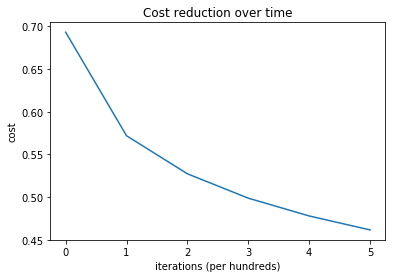

In [100]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()